In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# 1) Load dataset
iris = load_iris()
X = iris.data       # (150,4)
y = iris.target     # (150,)
classes = np.unique(y)
print("Classes:", classes, iris.target_names)



Matplotlib is building the font cache; this may take a moment.


Classes: [0 1 2] ['setosa' 'versicolor' 'virginica']


In [9]:
# 2) Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [10]:
# 3) Compute class means and global mean
class_means = {c: X_std[y == c].mean(axis=0) for c in classes}
mu_global = X_std.mean(axis=0)

print("\nClass Means:")
for c in classes:
    print(f"Class {c} ({iris.target_names[c]}):", class_means[c])
print("\nGlobal Mean:", mu_global)



Class Means:
Class 0 (setosa): [-1.01457897  0.85326268 -1.30498732 -1.25489349]
Class 1 (versicolor): [ 0.11228223 -0.66143204  0.28532388  0.1667341 ]
Class 2 (virginica): [ 0.90229674 -0.19183064  1.01966344  1.08815939]

Global Mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


In [11]:
# 4) Build SW and SB
n_features = X.shape[1]
SW = np.zeros((n_features, n_features))
SB = np.zeros((n_features, n_features))

for c in classes:
    Xc = X_std[y == c]
    mean_c = class_means[c]
    # Within-class scatter
    SW += (Xc - mean_c).T @ (Xc - mean_c)
    # Between-class scatter
    n_c = Xc.shape[0]
    mean_diff = (mean_c - mu_global).reshape(-1, 1)
    SB += n_c * (mean_diff @ mean_diff.T)

print("\nWithin-class scatter matrix SW:\n", SW)
print("\nBetween-class scatter matrix SB:\n", SB)


Within-class scatter matrix SW:
 [[57.19414039 38.01741201 16.95864185  9.00354437]
 [38.01741201 89.88257294 10.62508571 14.57007861]
 [16.95864185 10.62508571  8.79424214  4.69233162]
 [ 9.00354437 14.57007861  4.69233162 10.66756048]]

Between-class scatter matrix SB:
 [[ 92.80585961 -55.65287963 113.80442453 113.68762457]
 [-55.65287963  60.11742706 -74.89110136 -69.48896849]
 [113.80442453 -74.89110136 141.20575786 139.73748309]
 [113.68762457 -69.48896849 139.73748309 139.33243952]]


In [12]:
# 5) Solve eigenproblem
eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(SW) @ SB)

# Sort by eigenvalues
idx = np.argsort(eigvals)[::-1]
eigvals, eigvecs = eigvals[idx], eigvecs[:, idx]

print("\nEigenvalues (sorted):\n", eigvals)
print("\nEigenvectors (columns = LDs):\n", eigvecs)


Eigenvalues (sorted):
 [ 3.21919292e+01  2.85391043e-01  5.46486209e-15 -5.84246903e-16]

Eigenvectors (columns = LDs):
 [[-0.15128777  0.00693578 -0.00652393 -0.82847139]
 [-0.14733266  0.32786115  0.1508108   0.07285495]
 [ 0.85598541 -0.57170517  0.73710124  0.19002438]
 [ 0.47190474  0.75207191 -0.6587073   0.52174519]]


In [13]:
# 6) Select top k = C-1
k = len(classes) - 1
W = eigvecs[:, :k]

In [14]:
# 7) Project data
X_lda_manual = X_std @ W


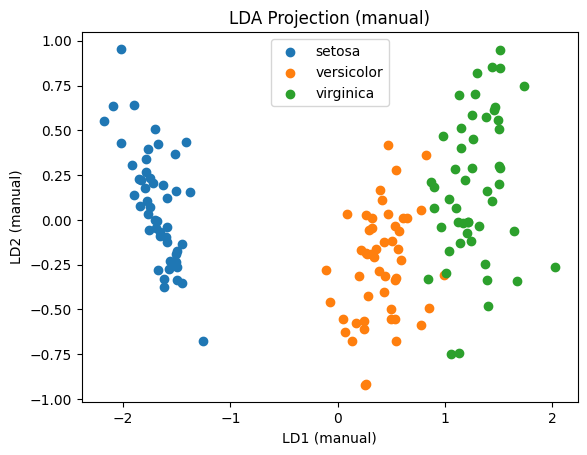

In [15]:
# 8) Plot 2D scatter (manual)
plt.figure()
for c, label in zip(classes, iris.target_names):
    plt.scatter(X_lda_manual[y==c,0], X_lda_manual[y==c,1], label=label)
plt.xlabel("LD1 (manual)")
plt.ylabel("LD2 (manual)")
plt.title("LDA Projection (manual)")
plt.legend()
plt.show()

In [16]:
# 9) Compare with scikit-learn LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_sklearn = lda.fit_transform(X_std, y)

print("\nScikit-learn LDA components (scalings_):\n", lda.scalings_)
print("\nExplained variance ratio:\n", lda.explained_variance_ratio_)


Scikit-learn LDA components (scalings_):
 [[ 0.68448644 -0.01989153]
 [ 0.66659193 -0.94029176]
 [-3.87282074  1.63962597]
 [-2.13508598 -2.15691008]]

Explained variance ratio:
 [0.9912126 0.0087874]


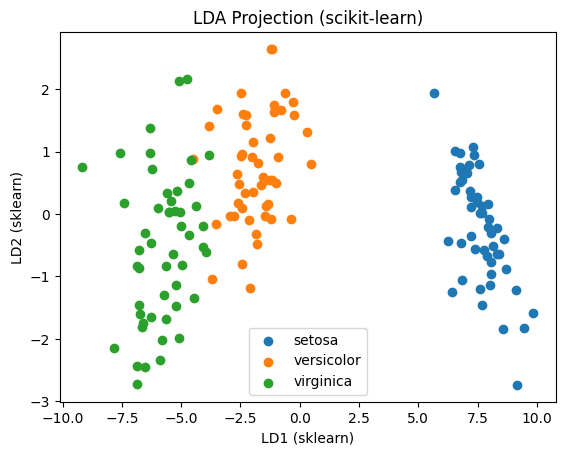

In [17]:
# 10) Plot sklearn LDA
plt.figure()
for c, label in zip(classes, iris.target_names):
    plt.scatter(X_lda_sklearn[y==c,0], X_lda_sklearn[y==c,1], label=label)
plt.xlabel("LD1 (sklearn)")
plt.ylabel("LD2 (sklearn)")
plt.title("LDA Projection (scikit-learn)")
plt.legend()
plt.show()